# Notebook 02: Algebraic One-Port Elements – Foundations of WDF

This notebook introduces **algebraic one-port elements** — components with **no memory** or delay — which serve as the fundamental building blocks in Wave Digital Filters.

We will analyze the wave behavior of:

- Resistor
- Short circuit
- Open circuit
- Ideal voltage source
- Resistive voltage source
- Switch

These are all **stateless** elements, whose wave behavior is derived directly from their physical definitions using Kirchhoff's laws and port transformations.

Based on §1.2.2 of *Kurt James Werner's Dissertation*.


A **one-port** is a circuit element with a single electrical port, characterized by two quantities:

- Voltage $v$
- Current $i$

An **algebraic one-port** has:
- No energy storage (no dynamics)
- A **direct relation** between $v$ and $i$
- Simple wave equations $(a, b)$

These components are passive (or neutral) and are always used at the **leaves** of a WDF connection tree.

## 1. Kirchhoff-Domain Behavior of Basic Elements

Let’s recall the classical (analog) behavior of these one-port components:

| Element         | Voltage-Current Relation           | Notes                     |
|------------------|------------------------------------|---------------------------|
| Resistor        | $v = R i$                         | Dissipates energy         |
| Short Circuit   | $v = 0$                           | Perfect conductor         |
| Open Circuit    | $i = 0$                           | Infinite impedance        |

Now we will transform each of these into the **wave domain**.


##  Resistor – Derivation of Wave Equations

A resistor satisfies the classical Ohm’s Law:

$$
v = R i
$$

In Wave Digital Filters (WDF), we define wave variables using the **port resistance** \( R_0 \):

$$
a = v + R_0 i,\quad b = v - R_0 i
$$

We want to solve for \( b \) in terms of \( a \), using \( v = R i \).

---

###  Step 1 – Express \( v \) and \( i \) using \( a \) and \( b \)

From the inverse wave definitions:

$$
v = \frac{a + b}{2}, \quad i = \frac{a - b}{2 R_0}
$$

Substitute into Ohm’s Law:

$$
\frac{a + b}{2} = R \cdot \frac{a - b}{2 R_0}
$$

---

###  Step 2 – Solve for \( b \)

Multiply both sides by 2 to eliminate denominators:

$$
a + b = \frac{R}{R_0} (a - b)
$$

Distribute both sides:

$$
a + b = \frac{R}{R_0} a - \frac{R}{R_0} b
$$

Group \( b \) terms on one side:

$$
b + \frac{R}{R_0} b = \frac{R}{R_0} a - a
$$

Factor:

$$
b \left( 1 + \frac{R}{R_0} \right) = a \left( \frac{R}{R_0} - 1 \right)
$$

Final expression:

$$
\boxed{b = \frac{R - R_0}{R + R_0} \cdot a}
$$

---

###  Matched Impedance Case: \( R = R_0 \)

$$
b = 0
$$

- No reflection: all incident energy is absorbed  
- This is called **impedance matching**  
- The resistor is **perfectly adapted** to the port



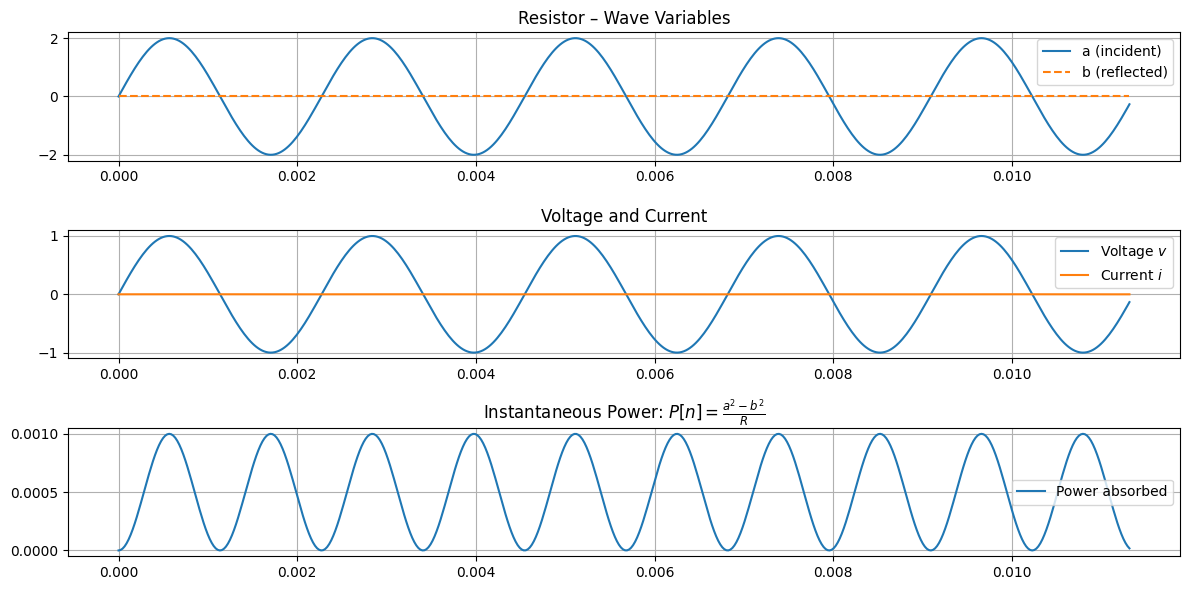

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define input signal (voltage wave)
fs = 44100
t = np.linspace(0, 1, fs, endpoint=False)
v = np.sin(2 * np.pi * 440 * t)
R = R0 = 1000
i = v / R

# Compute wave variables
a = v + R * i 
b = v - R * i

# Since v = a + b and i = (a - b)/R, this should match above
power = 0.25 * (a**2 - b**2) / R0

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
plt.plot(t[:500], a[:500], label='a (incident)')
plt.plot(t[:500], b[:500], '--', label='b (reflected)')
plt.title("Resistor – Wave Variables")
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(t[:500], v[:500], label='Voltage $v$')
plt.plot(t[:500], i[:500], label='Current $i$')
plt.title("Voltage and Current")
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.plot(t[:500], power[:500], label='Power absorbed')
plt.title("Instantaneous Power: $P[n] = \\frac{a^2 - b^2}{R}$")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [2]:
from pywdf.core.wdf import Resistor

# Create a resistor of 1k Ohms
R = Resistor(1000)

print("Port resistance Rp:", R.Rp)
print("Conductance G:", R.G)

# Incident wave
a = 1.0
R.accept_incident_wave(a)
b = R.propagate_reflected_wave()

print(f"Incident wave a = {a}, Reflected wave b = {b} (expected 0 if matched)")


Port resistance Rp: 1000
Conductance G: 0.001
Incident wave a = 1.0, Reflected wave b = 0 (expected 0 if matched)


##  3. Short and Open Circuits

These are **limiting cases** of impedance:

---

###  Short Circuit (Ideal Conductor)

A short circuit enforces:

$$
v = 0 \quad \Rightarrow \quad a + b = 0 \quad \Rightarrow \boxed{b = -a}
$$

This means: all incident energy is reflected with inversion.

No power is absorbed; this is a **lossless reflection**.

###  Open Circuit (No current flows)


An open circuit enforces:

$$
i = 0 \quad \Rightarrow \quad a - b = 0 \quad \Rightarrow \boxed{b = a}
$$

The incident wave is **reflected with no change in polarity**.


These behaviors are implemented directly in the `pywdf` library as algebraic rules.


In [3]:
from pywdf.core.wdf import ShortCircuit

S = ShortCircuit()
a = 1.0
S.accept_incident_wave(a)
b = S.propagate_reflected_wave()

print(f"ShortCircuit – a = {a}, b = {b} (expected -1.0)")


from pywdf.core.wdf import OpenCircuit

O = OpenCircuit()
a = 1.0
O.accept_incident_wave(a)
b = O.propagate_reflected_wave()

print(f"OpenCircuit – a = {a}, b = {b} (expected +1.0)")


ShortCircuit – a = 1.0, b = -1.0 (expected -1.0)
OpenCircuit – a = 1.0, b = 1.0 (expected +1.0)


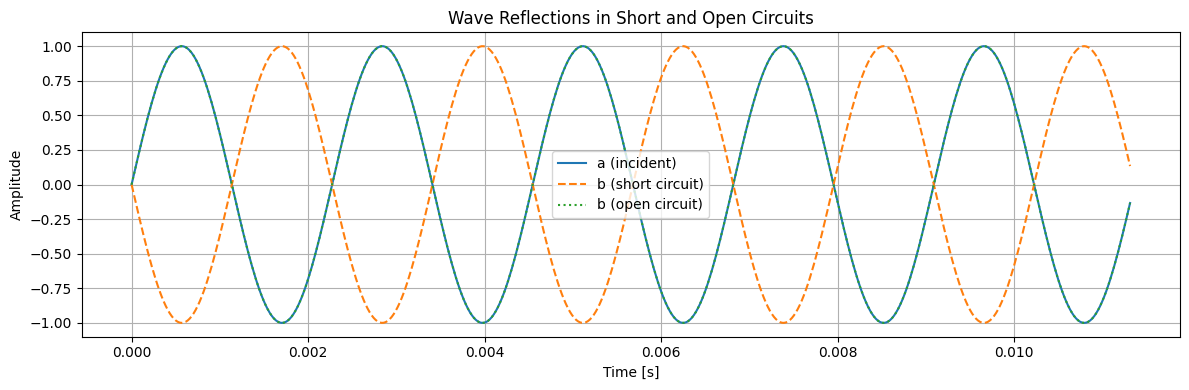

In [4]:
a = np.sin(2 * np.pi * 440 * t)

b_short = -a
b_open = a

plt.figure(figsize=(12, 4))
plt.plot(t[:500], a[:500], label='a (incident)')
plt.plot(t[:500], b_short[:500], '--', label='b (short circuit)')
plt.plot(t[:500], b_open[:500], ':', label='b (open circuit)')
plt.title("Wave Reflections in Short and Open Circuits")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Ideal Voltage Source – Wave Equation 

An **ideal voltage source** imposes a fixed voltage at its port:

$$
v = V_s
$$

### Step – Express $v$ using wave variables:

Recall the inverse transformation (from waves to physical quantities):

$$
v = \frac{a + b}{2}
$$

We now enforce:

$$
\frac{a + b}{2} = V_s
\quad\Rightarrow\quad
b = -a + 2V_s
$$

$$
\boxed{b = -a + 2V_s}
$$

This is the **wave-domain behavior** of an ideal voltage source.

- This element **reflects** the incoming wave while injecting twice its voltage.
- It is **non-passive** and must be placed **at the root of a WDF connection tree** to avoid delay-free loops.
- It does not adapt to other elements — its behavior is fixed regardless of impedance matching.

### Example with `pywdf`



In [5]:
from pywdf.core.wdf import IdealVoltageSource, Resistor

Vs_val = 1.5
source = IdealVoltageSource(Resistor(1000))
source.set_voltage(Vs_val)

a = 0.5
source.accept_incident_wave(a)
b = source.propagate_reflected_wave()

print(f"IdealVoltageSource – Vs = {Vs_val}, a = {a}, b = {b} (expected {2 * Vs_val - a})")

IdealVoltageSource – Vs = 1.5, a = 0.5, b = 2.5 (expected 2.5)


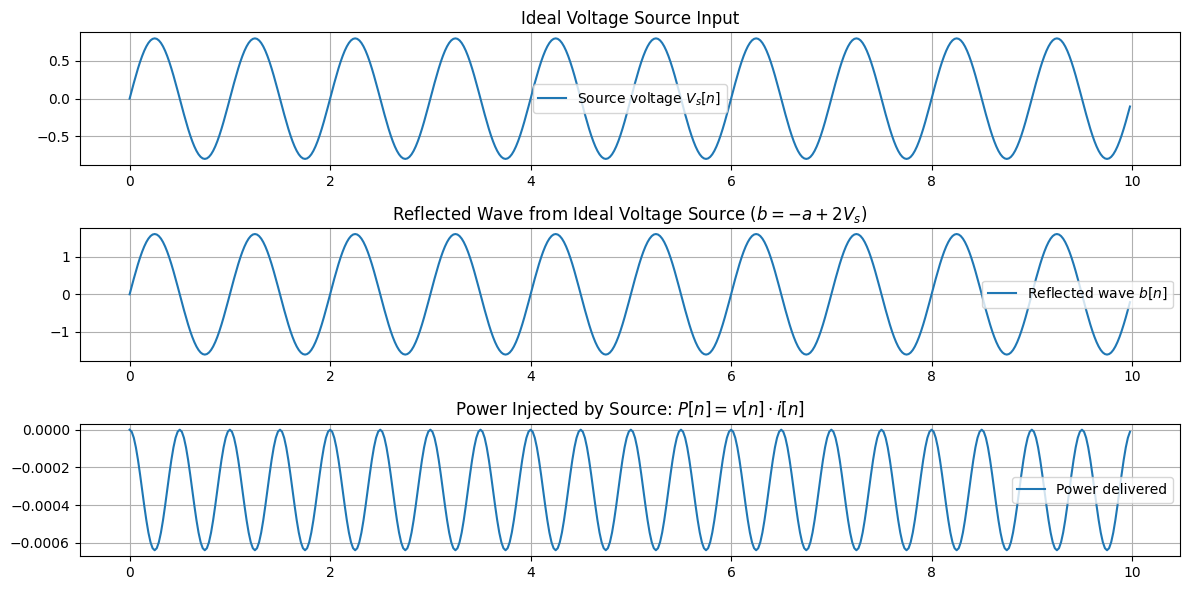

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pywdf.core.wdf import IdealVoltageSource, Resistor

# Signal parameters
fs = 48000
t = np.linspace(0, 0.01, int(0.01 * fs), endpoint=False)
Vs = 0.8 * np.sin(2 * np.pi * 1000 * t)

# Circuit: Ideal voltage source with 1kΩ resistor
R = Resistor(1000)
source = IdealVoltageSource(R)

a_vals, b_vals, v_vals, power_vals = [], [], [], []

for v_in in Vs:
    source.set_voltage(v_in)
    a = 0.0  # root receives no incoming wave
    source.accept_incident_wave(a)
    b = source.propagate_reflected_wave()

    v = (a + b) / 2
    i = (a - b) / (2*R.Rp)
    power = v * i

    a_vals.append(a)
    b_vals.append(b)
    v_vals.append(v)
    power_vals.append(power)

# Plotting results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t * 1000, Vs, label="Source voltage $V_s[n]$")
plt.title("Ideal Voltage Source Input")
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t * 1000, b_vals, label="Reflected wave $b[n]$")
plt.title("Reflected Wave from Ideal Voltage Source ($b = -a + 2V_s$)")
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t * 1000, power_vals, label="Power delivered")
plt.title("Power Injected by Source: $P[n] = v[n] \cdot i[n]$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


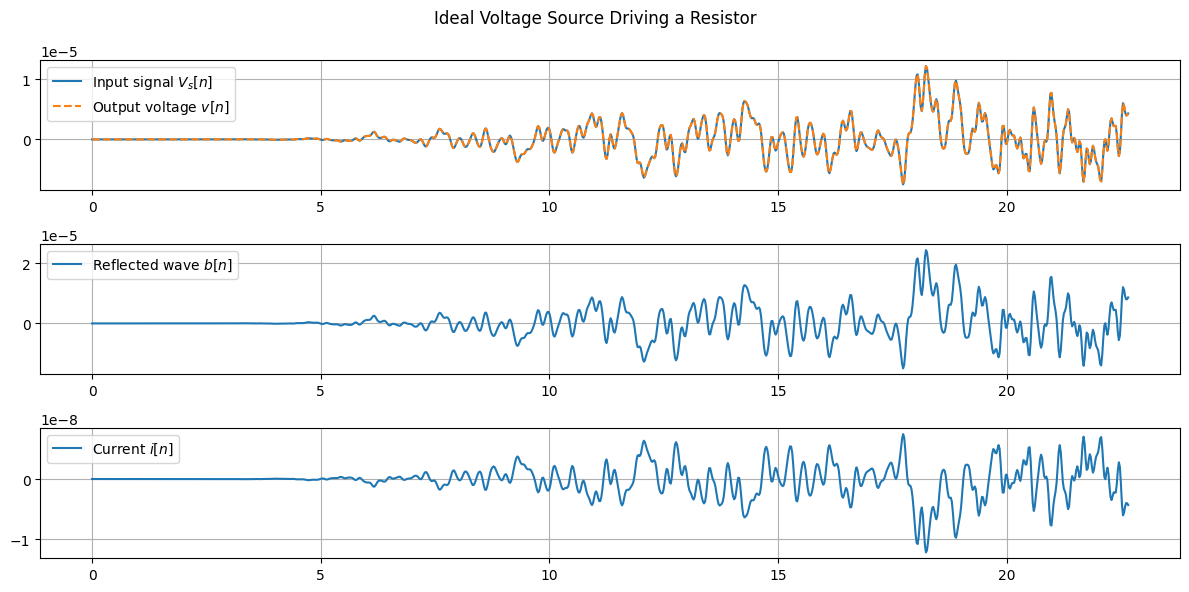

In [8]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

from pywdf.core.wdf import IdealVoltageSource, Resistor

# Load audio signal (mono)
audio_path = "/home/cepatinog/wdf/tutorial-wdf/audio_files/guitar_riff.mp3"
x, fs = sf.read(audio_path)

if x.ndim > 1:
    x = x[:, 0]  # convert to mono

# Build WDF system: Ideal source in series with resistor
R_value = 1000
load = Resistor(R_value)
source = IdealVoltageSource(load)

# Process
a_vals, b_vals, v_vals, i_vals = [], [], [], []

for sample in x:
    source.set_voltage(sample)       # V_s[n]
    a = 0.0                          # no incident wave at root
    source.accept_incident_wave(a)
    b = source.propagate_reflected_wave()

    v = (a + b) / 2                     # output voltage (inverse transform)
    i = (a - b) / (2 * R_value)         # current through resistor

    a_vals.append(a)
    b_vals.append(b)
    v_vals.append(v)
    i_vals.append(i)

# Plot a segment
t = np.arange(len(x)) / fs * 1000  # ms

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t[:1000], x[:1000], label="Input signal $V_s[n]$")
plt.plot(t[:1000], v_vals[:1000], '--', label="Output voltage $v[n]$")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t[:1000], b_vals[:1000], label="Reflected wave $b[n]$")
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t[:1000], i_vals[:1000], label="Current $i[n]$")
plt.grid()
plt.legend()

plt.suptitle("Ideal Voltage Source Driving a Resistor")
plt.tight_layout()
plt.show()


La salida $v[n]$ es el doble de la señal de entrada: $v[n] = 2 V_s[n]$

La onda reflejada $b[n] = 2 V_s[n]$

La corriente $i[n] = -2 V_s[n] / R$